In [18]:
# Import plotting envrionment for data visualizations
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
# import dependencies
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# Create a reference to the file
# database_path = Path("sqlite:///Resources/hawaii.sqlite")

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()

#Reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/6v/xbr7r4ss7jngs86_6rz5t33h0000gn/T/ipykernel_41939/2922293966.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [25]:
# View all of the classes that automap found
class_names = [cls.__name__.lower() for cls in Base.classes]
print(class_names)

['station', 'measurement']


In [26]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


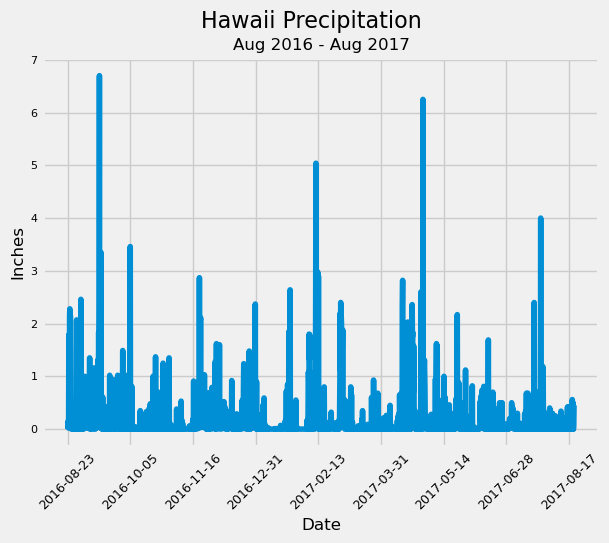

<Figure size 1800x1200 with 0 Axes>

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_12_months = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
one_year_previous = dt.date(last_12_months.year, last_12_months.month, last_12_months.day)

# Perform a query to retrieve the data and precipitation scores
precipitation_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_previous).\
    order_by(Measurement.date).all()

# Convert the 'date' column to datetime if necessary
# data_df['date'] = pd.to_datetime(data_df['date']) 

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(precipitation_results, columns=['date', 'precipitation'])

# Sort the dataframe by date
data_df.set_index('date', inplace=True)

# Drop all null values
cleaned_df = data_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
cleaned_df.plot(y='precipitation', legend=False)  # Removed 'date' as it is the index
plt.xlabel('Date', size=12)
plt.ylabel('Inches', size=12)
plt.title('Aug 2016 - Aug 2017', size=12)
plt.suptitle('Hawaii Precipitation', fontsize=16)
plt.xticks(rotation=45, size=9)
plt.yticks(size=8)
plt.figure(figsize=(18, 12)) 
plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
cleaned_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [33]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

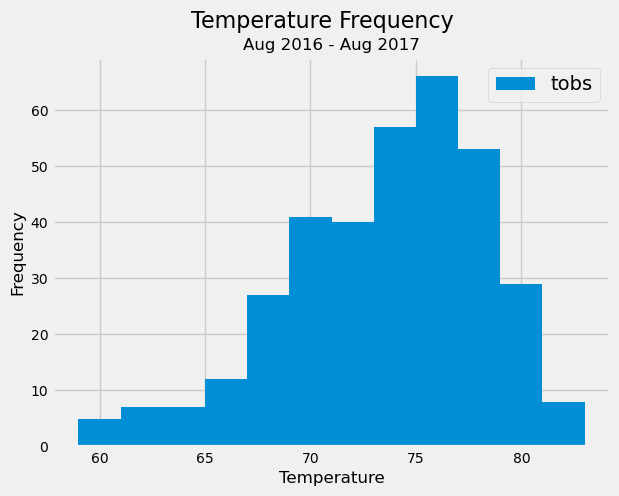

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()

# Plot and label histogram
active_station_temp = pd.DataFrame(temp_obs, columns=['tobs'])
active_station_temp.plot.hist(bins=12)
plt.title('Aug 2016 - Aug 2017', size=12)
plt.suptitle('Temperature Frequency', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks( size=10)
plt.yticks(size=10)
plt.show()

# Close Session

In [36]:
# Close Session
session.close()